# Guía 2

## Importación de modulos

In [3]:
import os
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
import mne

## PCA

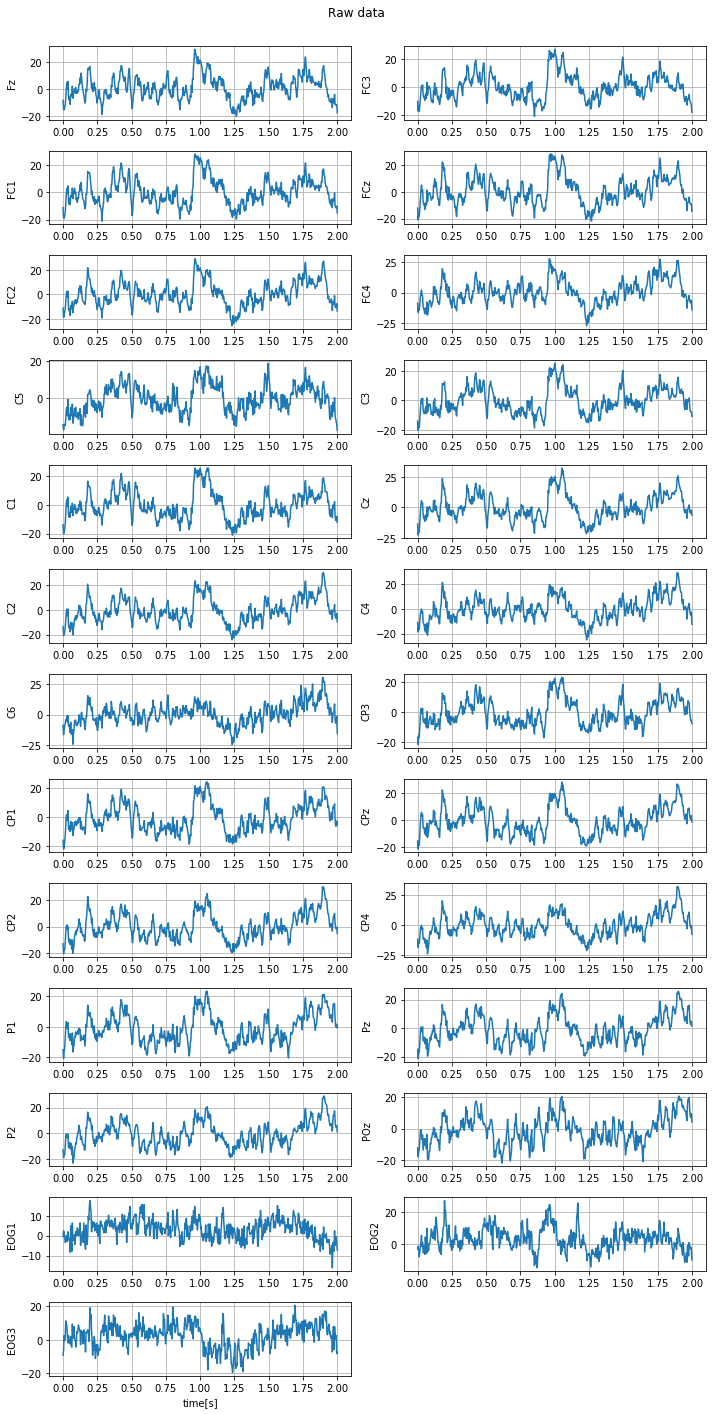

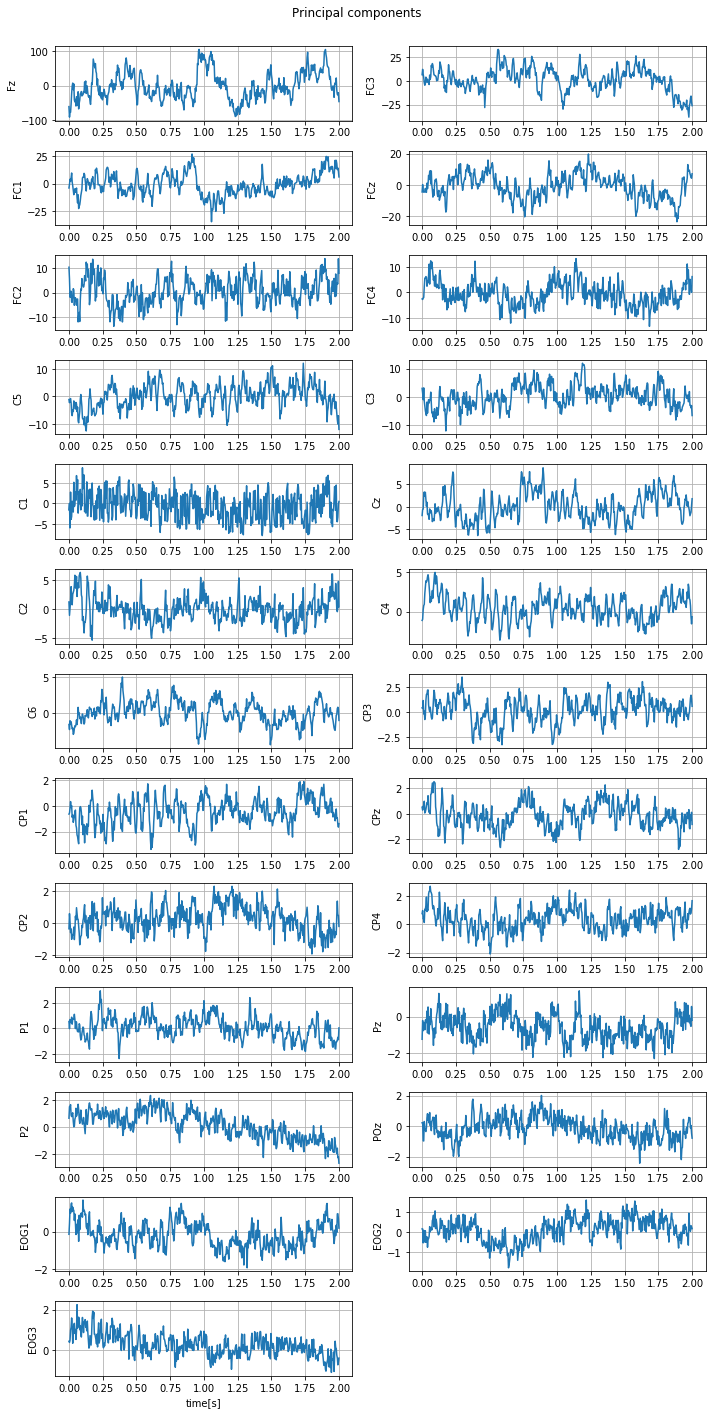

In [14]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA

data = spio.loadmat('Datos/DataEEG_EOG_bis.mat')
sampling_freq = data['sf'][0][0]
channel_names = [data['ChannelNames'][i][0][0]for i in range(len(data['ChannelNames']))]

datos = data['Datos']
datos = np.swapaxes(datos,0,2)

pca = UnsupervisedSpatialFilter(PCA(), average = False)
data_pca = pca.fit_transform(datos)

tiempo = [i/sampling_freq for i in range(len(datos[0][0]))]

fig1 = plt.figure(figsize=(10,20))
fig2 = plt.figure(figsize=(10,20))
for i in range(len(datos[0])):
	ax1 = fig1.add_subplot(13,2,(i+1))
	ax1.grid()
	ax1.set_ylabel('{}'.format(channel_names[i]))
	ax1.plot(tiempo, datos[0][i])
	ax2 = fig2.add_subplot(13,2,i+1)
	ax2.grid()
	ax2.set_ylabel('{}'.format(channel_names[i]))
	ax2.plot(tiempo, data_pca[0][i])
ax1.set_xlabel('time[s]')
ax2.set_xlabel('time[s]')
fig1.suptitle('Raw data')
fig2.suptitle('Principal components')
fig1.tight_layout(rect = (0, 0, 1, 0.96))
fig2.tight_layout(rect = (0, 0, 1, 0.96))

## ICA

288 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-15-45674377f512>:23: DeprecationWarning: method='extended-infomax' is deprecated and will be removed in 0.19. If you want to use Extended Infomax, specify method='infomax' together with fit_params=dict(extended=True).
  ica = mne.preprocessing.ICA(method = 'extended-infomax', random_state = 1)


Using all PCA components: 22
Computing Extended Infomax ICA
Fitting ICA took 29.3s.


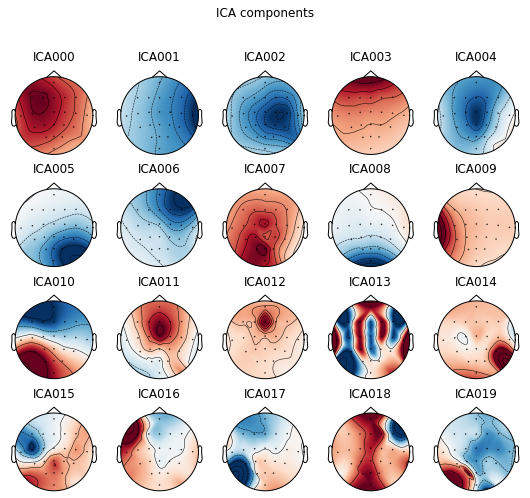

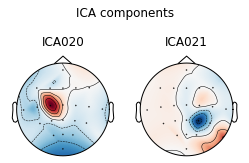

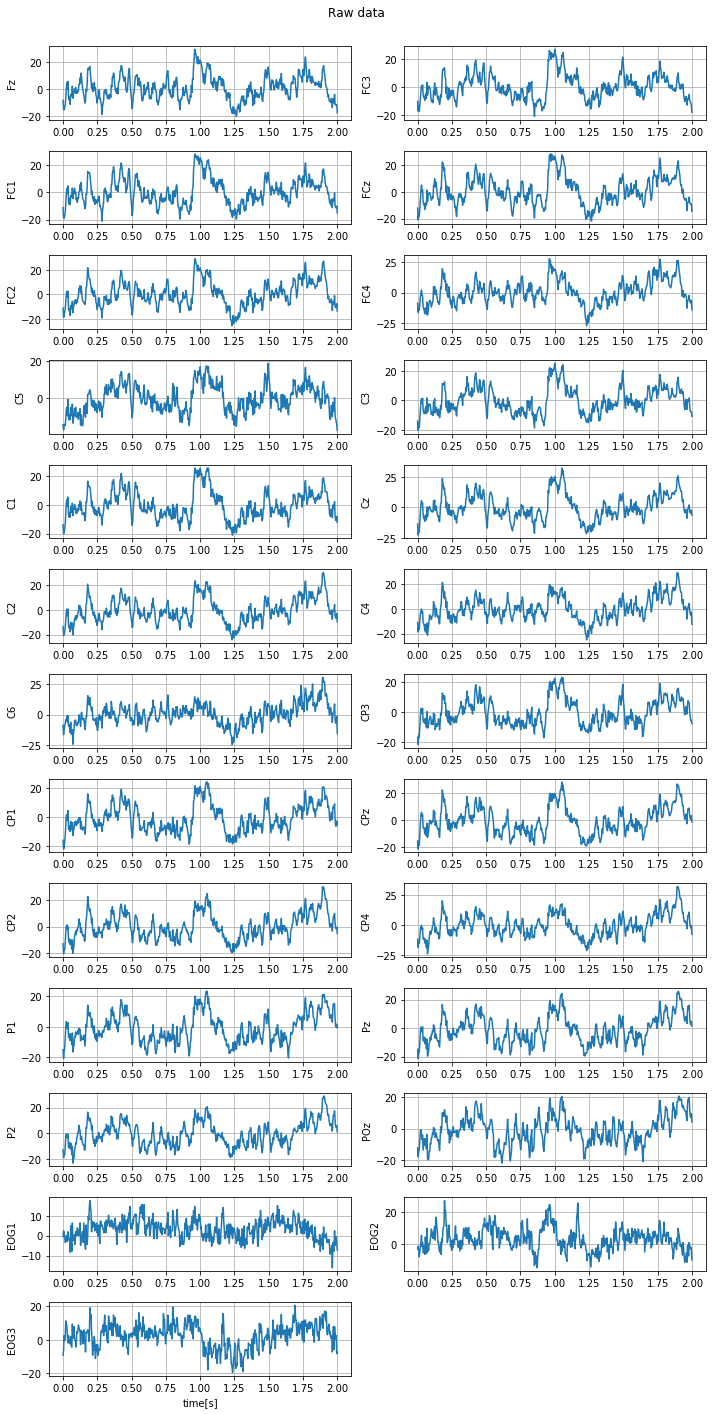

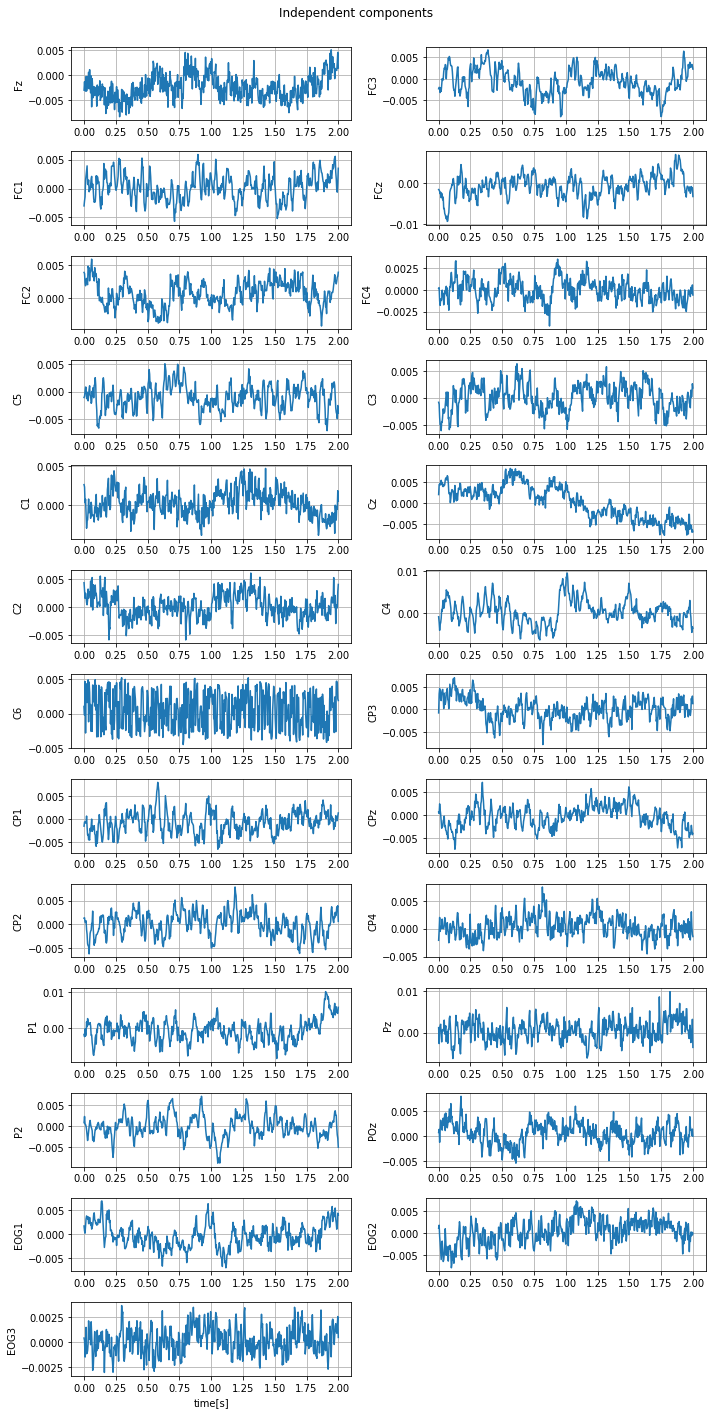

In [15]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import FastICA

data = spio.loadmat('Datos/DataEEG_EOG_bis.mat')

sampling_freq = data['sf'][0][0]

tiempo = [i/sampling_freq for i in range(len(datos[0][0]))]

datos = data['Datos']
datos = np.swapaxes(datos,0,2)

channel_names = [data['ChannelNames'][i][0][0]for i in range(len(data['ChannelNames']))]
tipos = ['eeg' for i in range(len(data['ChannelNames'])-3)]+['eog' for i in range(3)]

info = mne.create_info(ch_names = channel_names, sfreq = sampling_freq, ch_types = tipos)

eeg = mne.EpochsArray(datos, info)
eeg.set_montage('standard_1020')

eeg_temp = eeg.copy()

ica = mne.preprocessing.ICA(method = 'extended-infomax', random_state = 1)
ica.fit(eeg_temp)

ica.plot_components(inst = eeg_temp)

###-------- PLOT RAW DATA AND INDEPENDENT COMPONENTS -------###

ICA_transformer = UnsupervisedSpatialFilter(FastICA(), average = False)

data_ICA = ICA_transformer.fit_transform(datos)

fig1 = plt.figure(figsize=(10,20))
fig2 = plt.figure(figsize=(10,20))
for i in range(len(datos[0])):
	ax1 = fig1.add_subplot(13,2,(i+1))
	ax1.grid()
	ax1.set_ylabel('{}'.format(channel_names[i]))
	ax1.plot(tiempo, datos[0][i])
	ax2 = fig2.add_subplot(13,2,i+1)
	ax2.grid()
	ax2.set_ylabel('{}'.format(channel_names[i]))
	ax2.plot(tiempo, data_ICA[0][i])
ax1.set_xlabel('time[s]')
ax2.set_xlabel('time[s]')
fig1.suptitle('Raw data')
fig2.suptitle('Independent components')
fig1.tight_layout(rect = (0, 0, 1, 0.96))
fig2.tight_layout(rect = (0, 0, 1, 0.96))

ica.exclude = [8, 9, 14]


## CSP

288 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Computing data rank from raw with rank=None
    Using tolerance 51 (2.2e-16 eps * 25 dim * 9.2e+15  max singular value)
    Estimated rank (mag): 25
    MAG: rank 25 computed from 25 data channels with 0 projectors
Reducing data rank from 25 -> 25
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 53 (2.2e-16 eps * 25 dim * 9.6e+15  max singular value)
    Estimated rank (mag): 25
    MAG: rank 25 computed from 25 data channels with 0 projectors
Reducing data rank from 25 -> 25
Estimating covariance using EMPIRICAL
Done.


/home/joaco/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Computing data rank from raw with rank=None
    Using tolerance 54 (2.2e-16 eps * 25 dim * 9.7e+15  max singular value)
    Estimated rank (mag): 25
    MAG: rank 25 computed from 25 data channels with 0 projectors
Reducing data rank from 25 -> 25
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 52 (2.2e-16 eps * 25 dim * 9.4e+15  max singular value)
    Estimated rank (mag): 25
    MAG: rank 25 computed from 25 data channels with 0 projectors
Reducing data rank from 25 -> 25
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 52 (2.2e-16 eps * 25 dim * 9.4e+15  max singular value)
    Estimated rank (mag): 25
    MAG: rank 25 computed from 25 data channels with 0 projectors
Reducing data rank from 25 -> 25
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 52 (2.2e-16 eps * 25 dim * 9.3e+15  max singular value)
    

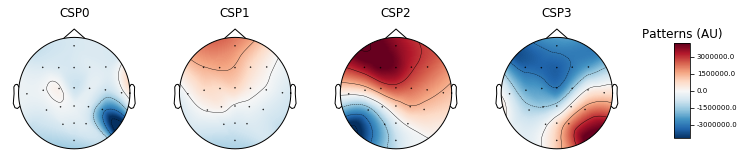

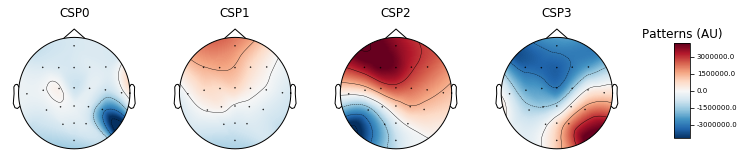

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

###------- LOAD DATA --------###
data = spio.loadmat('Datos/DataEEG_EOG_bis.mat')

sampling_freq = data['sf'][0][0]
tiempo = [i/sampling_freq for i in range(len(datos[0][0]))]
datos = data['Datos']
datos = np.swapaxes(datos,0,2)
labels = data['etiquetas'][0]
channel_names = [data['ChannelNames'][i][0][0]for i in range(len(data['ChannelNames']))]

###--- SET MNE DATA FORMAT ---###
tipos = ['eeg' for i in range(len(data['ChannelNames'])-3)]+['eog' for i in range(3)]
info = mne.create_info(ch_names = channel_names, sfreq = sampling_freq, ch_types = tipos)
eeg = mne.EpochsArray(datos, info)
eeg.set_montage('standard_1020')
eeg_temp = eeg.get_data()

###------ CSP ------###
# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, eeg_temp, labels, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(eeg_temp, labels)
csp.plot_patterns(eeg.info, ch_type='eeg', units='Patterns (AU)', size=1.5)